In [1]:
!pip install ipycytoscape

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/3.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.6 MB 2.8 MB/s eta 0:00:02
   -------------- ------------------------- 1.3/3.6 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 2.4/3.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 3.1/3.6 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 3.4/3.6 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 3.4/3.6 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 3.4/3.6 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 3.6/3.6 MB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 8.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 2.9 MB/s eta 0:00:01
   ---------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from ipycytoscape import CytoscapeWidget

G = nx.read_pajek("mon_graphe.net")


if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
    G = nx.Graph(G)

print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre d’arêtes :", G.number_of_edges())

Nombre de nœuds : 4
Nombre d’arêtes : 5


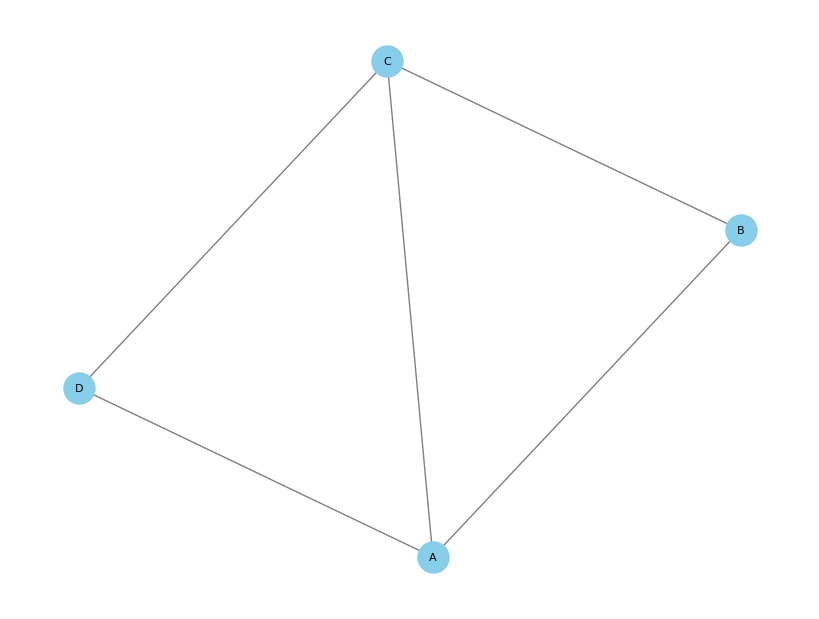

Degré des nœuds :
A : 3
B : 2
C : 3
D : 2


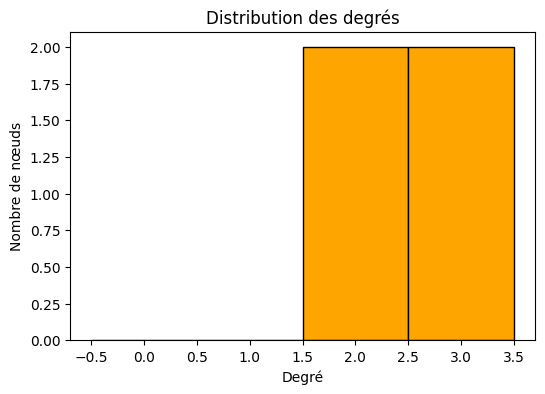

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …

In [4]:
plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=8)
plt.show()


degrees = dict(G.degree())
print("Degré des nœuds :")
for node, deg in degrees.items():
    print(node, ":", deg)

plt.figure(figsize=(6,4))
plt.hist(list(degrees.values()), bins=range(max(degrees.values())+2), color="orange", edgecolor="black", align="left")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés")
plt.show()


cyto = CytoscapeWidget()
cyto.graph.add_graph_from_networkx(G)
cyto.set_style([
    {
        "selector": "node",
        "style": {
            "content": "data(id)",
            "background-color": "skyblue",
            "width": "30px",
            "height": "30px"
        }
    },
    {
        "selector": "edge",
        "style": {
            "line-color": "gray"
        }
    }
])
cyto